In [1]:
import pandas as pd
df = pd.read_csv("c:/data/ozone/ozone.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18812\2306644543.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


C:\Users\user\AppData\Local\Temp\ipykernel_18812\1880191123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette=colors)


<Axes: xlabel='Result', ylabel='count'>

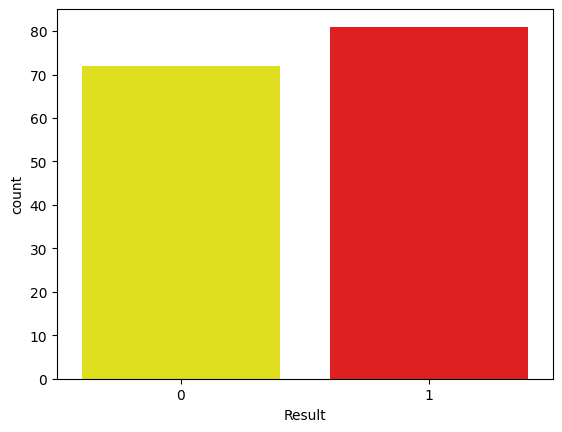

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]
sns.countplot(x='Result', data=df, palette=colors)
# 불균형 데이터셋

In [3]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

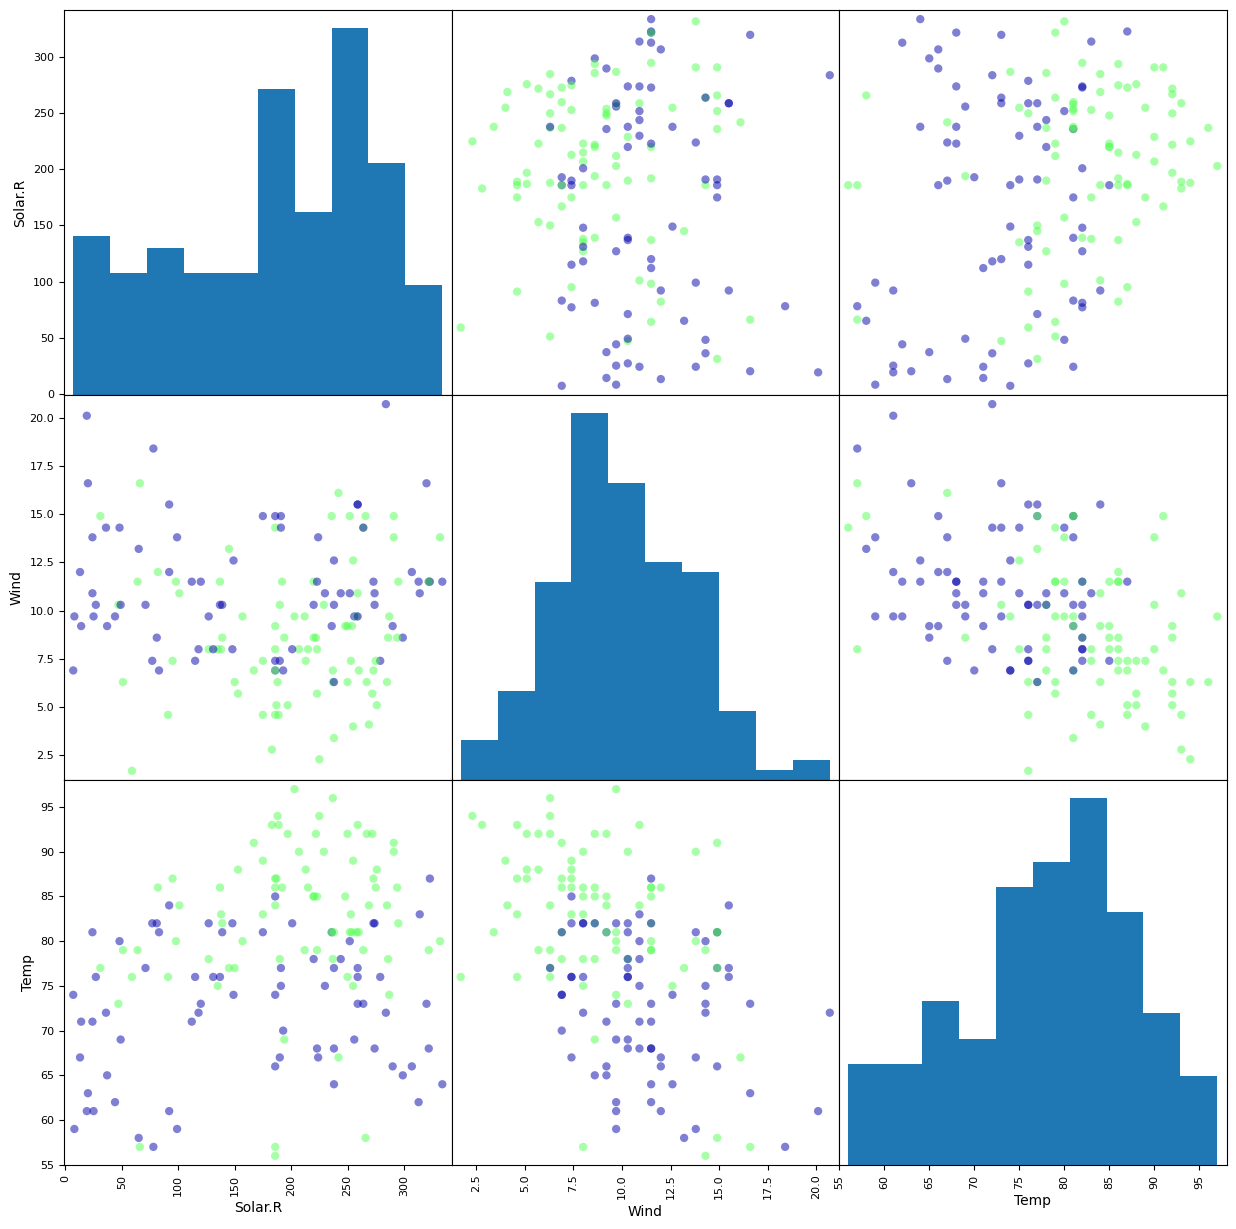

In [4]:
import mglearn
import matplotlib.pyplot as plt

# 산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)
plt.show()

In [5]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

x_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([x_samp, y_samp], axis=1)
df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [6]:
X = x_samp[cols]
y = y_samp['Result']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [9]:
import numpy as np

pred = model.predict(X_test)

print("예측값 : " ,pred)
print("실제값 : " , y_test.values)
print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))
print("검증용 : ", np.mean(pred == y_test))

예측값 :  [1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0]
실제값 :  [1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1]
학습용 :  0.7565217391304347
검증용 :  0.5862068965517241
검증용 :  0.5862068965517241


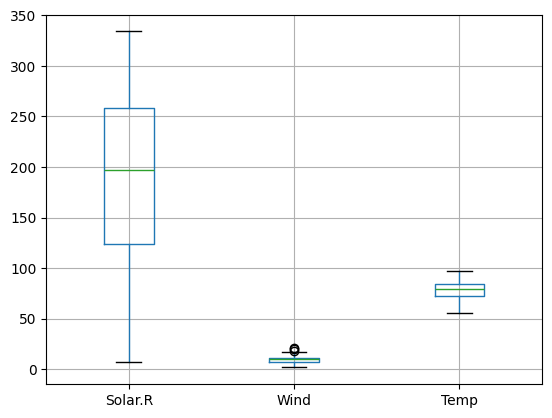

In [10]:
X_train.boxplot()
plt.show()

In [11]:
# Normalization 정규화, 모든 변수의 값이 0~1 사이의 값을 갖도록 조정

# 인공신경망,딥러닝에서 자주 사용

# 변수의 범위를 왜곡하지 않음

# (특정값-최소값)/(최대값-최소값)

# 특정 데이터가 가지는 위치를 보고 싶을 때

# (예) 전체 고객 중 체중이 가장 작은 사람이 40Kg, 가장 큰 사람이 120Kg 일 때

# 40Kg  0으로 변환

# 120Kg 1로 변환

# 80Kg  (80-40)/(120-40) = 40/80 = 0.5로 변환

# 학습용 데이터셋에서 특성별 최소값 계산

min_on_training = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산

range_on_training = (X_train -  min_on_training).max(axis=0)

# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨

X_train_scaled = (X_train - min_on_training) / range_on_training

# 검증용 데이터셋에도 같은 작업을 적용

# 학습용 데이터셋에서 계산한 최소값과 범위를 사용

X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))

print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))


특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


In [12]:
#Standardization 표준화, 평균 0, 표준편차 1

# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법

# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값

# (측정값-평균) / 표준편차

# k-means, svm 등 거리 기반의 모델에서 주로 사용함

# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다

# 1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함)

# 학습용 데이터셋의 변수들의 평균값 계산

mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산

std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면

# 평균 0, 표준편차 1인 데이터로 변환됨

X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용

X_test_scaled = (X_test - mean_on_train) / std_on_train

print(X_train_scaled.describe())

print(X_test_scaled.describe())

            Solar.R          Wind          Temp
count  1.150000e+02  1.150000e+02  1.150000e+02
mean  -1.293651e-16 -2.277164e-16  4.749824e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.962623e+00 -2.344608e+00 -2.223487e+00
25%   -6.821378e-01 -7.421780e-01 -5.556450e-01
50%    1.257223e-01 -9.558353e-02  1.740356e-01
75%    8.016869e-01  4.104469e-01  6.952361e-01
max    1.631530e+00  2.996825e+00  2.050357e+00
         Solar.R       Wind       Temp
count  29.000000  29.000000  29.000000
mean    0.019574  -0.040327   0.138091
std     0.885968   0.901161   0.950602
min    -1.742798  -2.035367  -1.702286
25%    -0.643668  -0.742178  -0.555645
50%     0.081757   0.073093   0.069796
75%     0.642313   0.410447   0.903716
max     1.477651   1.844200   1.737637


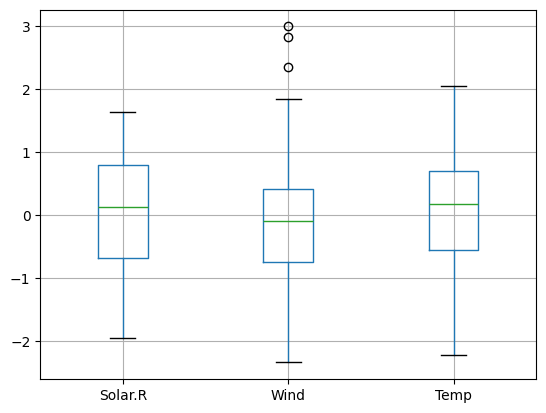

In [13]:
X_train_scaled.boxplot()
plt.show()

In [14]:
# 표준화된 데이터로 다시 학습
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용: ", model.score(X_train_scaled, y_train))
print("검증용: ", model.score(X_test_scaled, y_test))

# 정확도가 높아짐

학습용:  0.7478260869565218
검증용:  0.8275862068965517


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, pred)
cm

array([[13,  1],
       [ 4, 11]], dtype=int64)

In [16]:
df_cm = pd.DataFrame(cm, index=[0,1],
                     columns=[0,1]
                     )
df_cm

,0,1
0,13,1
1,4,11


<Axes: title={'center': 'Confusion Matrix'}>

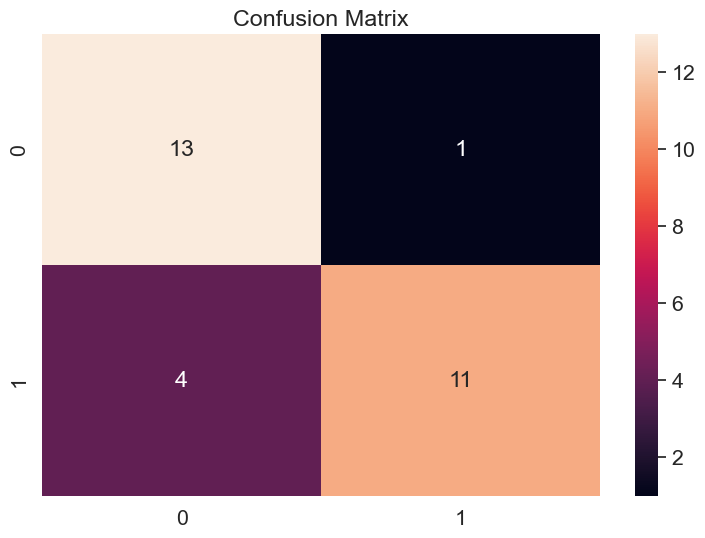

In [17]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)